In [1]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
nonendemic = pd.read_csv('Non_Endemic_Yemen_Qatar_Kuwait_Bahrain.csv')
nonendemic.isnull().sum()[nonendemic.isnull().sum() != 0]

Maximum Temperature      180
Minimum Temperature      180
Temperature              180
Wind Chill             14993
Heat Index              5876
Snow                   16076
Snow Depth             16070
Wind Speed               181
Wind Direction          3224
Wind Gust              14958
Visibility               185
Cloud Cover              180
Relative Humidity        181
Conditions               180
dtype: int64

In [3]:
nonendemic=nonendemic.drop(['Wind Chill', 'Snow', 'Snow Depth', 'Wind Gust'],axis=1)
nonendemic

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Sana'a, Yemen",1/1/2000,74.0,39.3,55.1,NaN,0.00,13.9,248.00,7.1,9.4,40.23,Clear
1,"Sana'a, Yemen",1/2/2000,75.8,41.1,59.8,NaN,0.00,18.3,217.50,6.4,11.4,32.94,Clear
2,"Sana'a, Yemen",1/3/2000,75.5,39.3,55.6,NaN,0.00,17.2,168.33,6.6,7.9,35.94,Clear
3,"Sana'a, Yemen",1/4/2000,75.3,41.1,57.6,NaN,0.00,13.9,180.00,7.2,1.8,32.05,Clear
4,"Sana'a, Yemen",1/5/2000,75.3,49.7,62.5,NaN,0.00,9.2,360.00,9.3,0.0,27.82,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16071,"Manama, Bahrain",12/28/2010,70.0,60.0,64.8,NaN,0.00,15.6,295.63,6.6,0.0,67.60,Clear
16072,"Manama, Bahrain",12/29/2010,70.0,60.1,65.3,NaN,0.00,13.5,299.79,5.9,7.2,67.02,Clear
16073,"Manama, Bahrain",12/30/2010,73.3,61.9,68.2,NaN,0.00,12.3,149.63,6.4,6.9,50.52,Clear
16074,"Manama, Bahrain",12/31/2010,71.1,63.8,67.3,NaN,1.02,7.9,158.88,6.7,17.9,48.03,Rain


In [4]:
endemic = pd.read_csv('Endemic_Weather_Data.csv')
endemic.isnull().sum()[endemic.isnull().sum() != 0]

Maximum Temperature     1122
Minimum Temperature     1122
Temperature             1122
Wind Chill             11814
Heat Index              3209
Snow                   12057
Snow Depth             12057
Wind Speed              1122
Wind Direction          3268
Wind Gust              11996
Visibility              1122
Cloud Cover             1122
Relative Humidity       1123
Conditions              1122
dtype: int64

In [5]:
endemic=endemic.drop(['Wind Chill', 'Snow', 'Snow Depth', 'Wind Gust'],axis=1)
endemic

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Al-Kharj, Saudi Arabia",1/1/2000,73.5,46.5,58.9,NaN,0.00,8.1,242.50,6.8,1.3,35.70,Clear
1,"Al-Kharj, Saudi Arabia",1/2/2000,71.7,46.5,59.0,NaN,0.00,4.7,183.75,6.8,1.3,35.89,Clear
2,"Al-Kharj, Saudi Arabia",1/3/2000,84.3,46.5,60.0,81.7,0.00,8.1,169.41,6.8,12.9,33.70,Clear
3,"Al-Kharj, Saudi Arabia",1/4/2000,75.3,48.3,61.7,NaN,0.00,17.2,172.27,6.8,14.8,43.48,Clear
4,"Al-Kharj, Saudi Arabia",1/5/2000,78.9,53.7,65.8,NaN,0.00,19.5,176.19,6.8,55.7,41.49,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12052,"Muscat, Oman",12/28/2010,70.5,54.1,64.4,NaN,0.25,16.1,151.33,6.3,53.1,70.02,"Rain, Partially cloudy"
12053,"Muscat, Oman",12/29/2010,75.2,58.4,66.8,NaN,0.00,9.2,225.90,6.3,27.6,48.97,Partially cloudy
12054,"Muscat, Oman",12/30/2010,73.5,57.2,66.5,NaN,0.00,10.3,251.96,6.5,0.0,38.54,Clear
12055,"Muscat, Oman",12/31/2010,75.2,56.8,67.0,NaN,0.00,9.2,248.95,6.6,0.0,42.64,Clear


In [6]:
nonendemic['Date time'] = pd.to_datetime(nonendemic['Date time'],format= "%m/%d/%Y")
endemic['Date time'] = pd.to_datetime(endemic['Date time'],format= "%m/%d/%Y")

In [7]:
nonendemic.groupby(['Name', pd.DatetimeIndex(nonendemic['Date time']).year]).mean()

Maximum Temperature  Minimum Temperature  \
Name              Date time                                             
Al Ahmadi, Kuwait 2000                 92.809290            68.327322   
                  2001                 94.202740            68.665205   
                  2002                 92.647945            68.949041   
                  2003                 92.744384            68.613425   
                  2004                 92.640437            68.096448   
                  2005                 92.233791            68.304121   
                  2006                 92.995068            68.684110   
                  2007                 92.731233            68.782466   
                  2008                 90.676503            67.718033   
                  2009                 91.590411            69.318630   
                  2010                 94.834795            70.365479   
                  2011                 62.600000            48.200000   
Doha, Qata        2000                 91.352459            74.964481   
                  2001                 92.309589            75.381918   
                  2002                 91.970411            75.343562   
                  2003                 91.491781            75.872877   
                  2004                 91.654098            75.522678   
                  2005                 91.464658            75.181918   
                  2006                 91.433699            75.815068   
                  2007                 91.657534            75.805753   
                  2008                 91.240710            74.521311   
                  2009                 91.996164            75.770959   
                  2010                 93.361096            77.213699   
                  2011                 75.100000            53.600000   
Manama, Bahrain   2000                 87.541803            74.711475   
                  2001                 88.192055            75.451507   
                  2002                 87.868219            75.008767   
                  2003                 87.514521            75.450411   
                  2004                 87.354645            75.232514   
                  2005                 86.606575            74.830137   
                  2006                 87.475890            75.804932   
                  2007                 87.426575            75.727397   
                  2008                 87.607377            74.957377   
                  2009                 87.956986            76.305205   
                  2010                 89.343288            77.360548   
                  2011                 67.900000            52.100000   
Sana'a, Yemen     2000                 80.699717            57.861473   
                  2001                 78.969014            55.964507   
                  2002                 80.311111            55.617251   
                  2003                 76.441993            58.486833   
                  2004                 77.587059            55.775000   
                  2005                 79.655495            52.873077   
                  2006                 79.312672            53.726171   
                  2007                 78.728297            53.448626   
                  2008                 78.735792            52.616667   
                  2009                 79.222006            54.154875   
                  2010                 77.357955            54.303409   
                  2011                 69.800000            44.600000   

                             Temperature  Heat Index  Precipitation  \
Name              Date time                                           
Al Ahmadi, Kuwait 2000         80.396995   99.759052       0.037432   
                  2001         81.248767   99.038023       0.031014   
                  2002         80.756164   97.824498       0.030986   
                  2003 

In [8]:
endemic.groupby(['Name', pd.DatetimeIndex(endemic['Date time']).year]).mean()

Maximum Temperature  Minimum Temperature  \
Name                   Date time                                             
Al Ain, UAE            2000                 96.626776            71.800273   
                       2001                 96.955616            71.780548   
                       2002                 96.719726            72.138630   
                       2003                 96.479452            72.775068   
                       2004                 96.620765            72.434973   
                       2005                 96.102466            72.510959   
                       2006                 95.788219            72.820548   
                       2007                 96.402740            72.552055   
                       2008                 95.933880            71.704645   
                       2009                 96.221918            72.756712   
                       2010                 97.149315            73.142192   
                       2011                 73.700000            51.800000   
Al-Kharj, Saudi Arabia 2000                 94.539344            68.513115   
                       2001                 94.991507            69.816164   
                       2002                 84.743836            62.626027   
                       2003                103.741176            82.670588   
                       2004                 78.500000            78.500000   
                       2005                 96.279775            74.517978   
                       2006                 91.242857            70.636152   
                       2007                 91.987059            72.732353   
                       2008                 90.280814            71.005523   
                       2009                 92.492244            71.660111   
                       2010                 93.593064            72.204913   
                       2011                 69.900000            51.800000   
Muscat, Oman           2000                 91.116393            75.245902   
                       2001                 90.423288            75.146027   
                       2002                 90.603288            75.837808   
                       2003                 89.737808            75.264658   
                       2004                 91.220765            76.029508   
                       2005                 90.218904            75.672055   
                       2006                 90.461644            76.038630   
                       2007                 89.916164            75.375890   
                       2008                 89.553552            75.462568   
                       2009                 90.725753            77.150959   
                       2010                 90.553973            76.317534   
                       2011                 77.000000            49.700000   

                                  Temperature  Heat Index  Precipitation  \
Name                   Date time                                           
Al Ain, UAE            2000         83.716940   97.057605       0.001639   
                       2001         83.975616   96.268239       0.000932   
                       2002         84.075890   96.451582       0.007425   
                       2003         84.286301  100.915756       0.008575   
                       2004         84.193443   99.749846       0.004973   
                       2005         83.824110  101.282903       0.007068   
                       2006         83.815068  102.290236       0.047918   
                       2007         84.011781  102.250649       0.009315   
                       2008         83.284973  102.557047       0.005055   
                       2009         84.042466  102.942333       0.022192   
                       2010         84.918082  100.464151       0.001836   
                       2011         63.400000         NaN       0.000000   
Al-Kh

In [9]:
nonendemic['endemic'] = 0
endemic['endemic'] = 1
weather_df = pd.concat([nonendemic, endemic])

In [10]:
weather_df2 = weather_df.dropna()
weather_df2.columns

Index(['Name', 'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Heat Index', 'Precipitation', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Conditions', 'endemic'],
      dtype='object')

In [11]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [12]:
weather_df2 = weather_df2.groupby(['Name',pd.DatetimeIndex(weather_df2['Date time']).to_period('M')]).mean()
y_reload=weather_df2['endemic']
X_reload=weather_df2.drop(['endemic'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_reload, y_reload, test_size=0.3, random_state = 100)

In [14]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred)
test_acc

0.8090452261306532

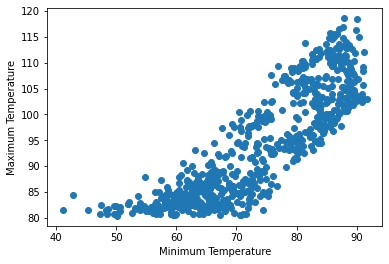

In [28]:
plt.scatter(weather_df2['Minimum Temperature'], weather_df2['Maximum Temperature'])
plt.xlabel("Minimum Temperature")
plt.ylabel("Maximum Temperature")
plt.savefig('maxmintemp.png')

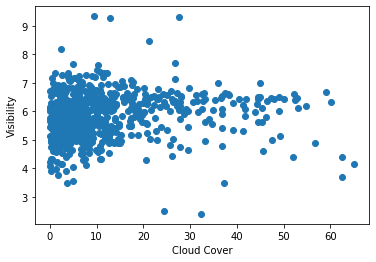

In [30]:
plt.scatter(weather_df2['Cloud Cover'], weather_df2['Visibility'])
plt.xlabel("Cloud Cover")
plt.ylabel("Visibility")
plt.savefig('visibilityCloudCover.png')

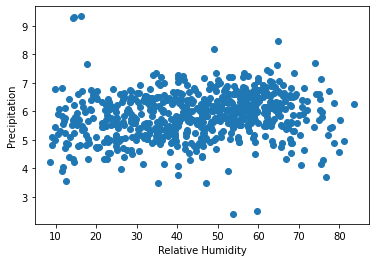

In [31]:
plt.scatter(weather_df2['Relative Humidity'], weather_df2['Visibility'])
plt.xlabel("Relative Humidity")
plt.ylabel("Precipitation")
plt.savefig('humidityPrecipitation.png')

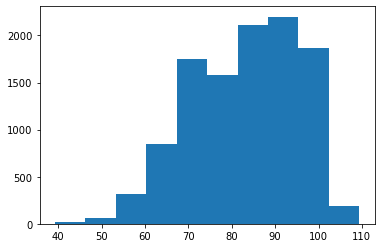

In [37]:
plt.hist(endemic['Temperature'])
plt.savefig('endemictmp.png')

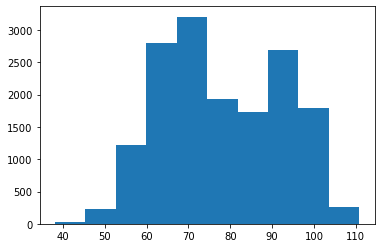

In [38]:
plt.hist(nonendemic['Temperature'])
plt.savefig('nonendemictemp.png')

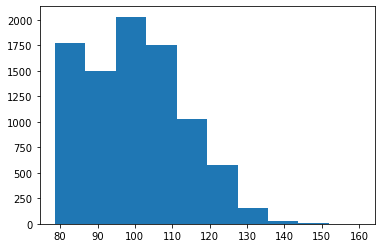

In [39]:
plt.hist(endemic['Heat Index'])
plt.savefig('endemicheatindex.png')

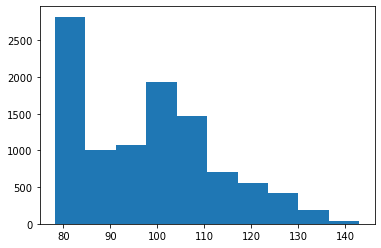

In [40]:
plt.hist(nonendemic['Heat Index'])
plt.savefig('nonendemicheatindex.png')

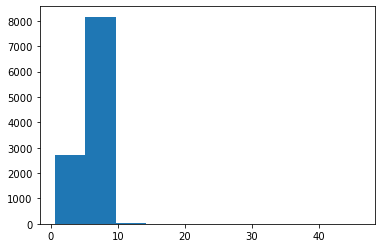

In [41]:
plt.hist(endemic['Visibility'])
plt.savefig('endemicvisibility.png')

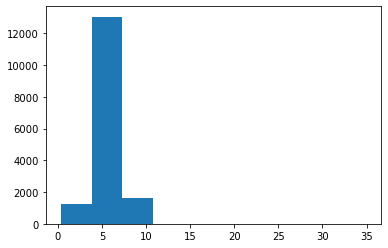

In [42]:
plt.hist(nonendemic['Visibility'])
plt.savefig('nonendemicvisibility.png')

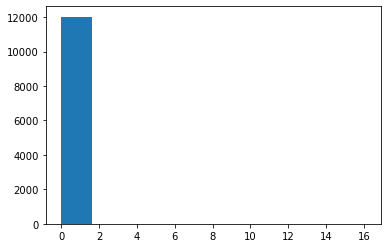

In [43]:
plt.hist(endemic['Precipitation'])
plt.savefig('endemicprecipitation.png')

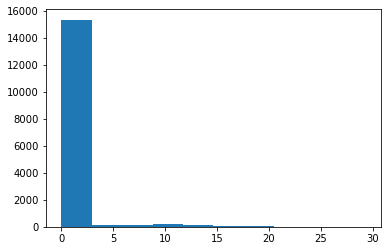

In [44]:
plt.hist(nonendemic['Precipitation'])
plt.savefig('nonendemicprecipitation.png')

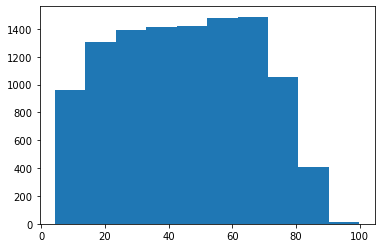

In [45]:
plt.hist(endemic['Relative Humidity'])
plt.savefig('endemichumidity.png')

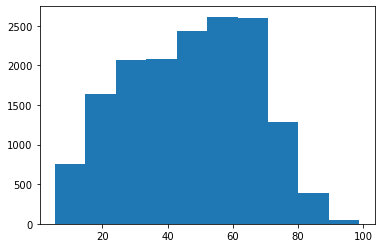

In [46]:
plt.hist(nonendemic['Relative Humidity'])
plt.savefig('nonendemichumidity.png')